In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2
import imutils
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from skimage import feature
from keras.utils import to_categorical
from imutils import build_montages,paths
import warnings

In [2]:
sns.set()

In [3]:
spiral_train_healthy = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/training/healthy/')
spiral_train_park = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/training/parkinson/')

fp_spiral_train_healthy = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/training/healthy/'
fp_spiral_train_park = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/training/parkinson/'

spiral_test_healthy = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/testing/healthy/')
spiral_test_park = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/testing/parkinson/')

fp_spiral_test_healthy = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/testing/healthy/'
fp_spiral_test_park = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/spiral/testing/parkinson/'

In [4]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features

In [5]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')

for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')

In [6]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

In [7]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
testX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
trainY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [10]:
testY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

In [11]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

In [12]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
model = RandomForestClassifier(n_estimators=100)

model.fit(trainX,trainY)

RandomForestClassifier()

In [15]:
preds = model.predict(testX)
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [16]:
cnf = confusion_matrix(testY,preds)
cnf

array([[14,  1],
       [ 4, 11]], dtype=int64)

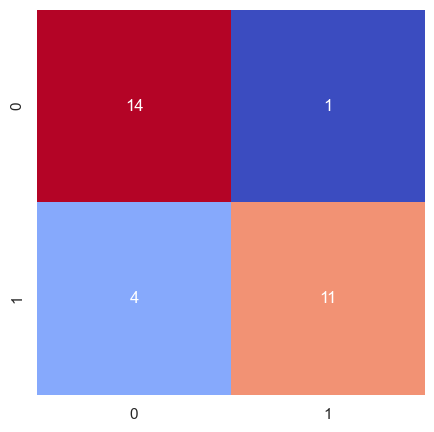

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [18]:
acc = metrics.accuracy_score(testY,preds)
acc

0.8333333333333334

In [19]:
indexes = np.random.randint(0,30,25)
indexes

array([ 6, 18, 22,  6,  1, 26,  6,  3, 15, 24, 15,  0,  2, 27,  3, 24,  3,
       25,  3, 12,  1,  2, 11,  3, 14])

In [20]:
labels = []

for i in indexes:
  pred = le.inverse_transform(preds)[i]
  labels.append(pred)

labels

['healthy',
 'parkinson',
 'parkinson',
 'healthy',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'healthy',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'parkinson',
 'healthy',
 'healthy',
 'healthy',
 'healthy']

In [21]:
results = []

for i in range(25):
  image = outputs[i]

  if labels[i] == 'healthy':
    color = (0,255,0)
  else:
    color = (0,0,255)

  text = str(labels[i])

  image = cv2.resize(image,(128,128))
  cv2.putText(image,text,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

  results.append(image)

In [22]:
montage = build_montages(results,(128,128),(5,5))[0]

cv2.imshow("Output",montage)
cv2.waitKey(0)

-1

# Image preprocessing of wave drawings

In [23]:
wave_train_healthy = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/training/healthy/')
wave_train_park = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/training/parkinson/')

fp_wave_train_healthy = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/training/healthy/'
fp_wave_train_park = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/training/parkinson/'

wave_test_healthy = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/testing/healthy/')
wave_test_park = os.listdir('C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/testing/parkinson/')

fp_wave_test_healthy = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/testing/healthy/'
fp_wave_test_park = 'C:/Users/amirt/Desktop/Parkinson_Disease/dataset/wave/testing/parkinson/'

In [24]:
def quantify_image1(image1):
  features1 = feature.hog(image1,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features1

In [25]:
trainX1 = []
testX1 = []
outputs1 = []
trainY1 = []
testY1 = []

for i in wave_train_healthy:
  image1 = cv2.imread(fp_wave_train_healthy+i)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 =cv2.threshold(image1, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  trainX1.append(features1)
  trainY1.append('healthy')

for i in wave_train_park:
  image1 = cv2.imread(fp_wave_train_park+i)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 = cv2.threshold(image1 ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  trainX1.append(features1)
  trainY1.append('parkinson')

for i in wave_test_healthy:
  image1 = cv2.imread(fp_wave_test_healthy+i)
  outputs1.append(image1)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 = cv2.threshold(image1 ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  testX1.append(features1)
  testY1.append('healthy')

for i in wave_test_park:
  image1 = cv2.imread(fp_wave_test_park+i)
  outputs1.append(image1)
  image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2GRAY)
  image1 = cv2.resize(image1 , (200,200))
  image1 = cv2.threshold(image1 ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features1 = quantify_image1(image1)
  testX1.append(features1)
  testY1.append('parkinson')

In [26]:
trainX1 = np.array(trainX)
testX1 = np.array(testX)
trainY1 = np.array(trainY)
testY1 = np.array(testY)

trainX1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
testX1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
trainY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
testY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
le = LabelEncoder()
trainY1 = le.fit_transform(trainY)
testY1 = le.transform(testY)

In [31]:
trainY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
testY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
le = LabelEncoder()

trainY1 = le.fit_transform(trainY1)
testY1 = le.transform(testY1)

trainY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [34]:
testY1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

model.fit(trainX1,trainY1)

KNeighborsClassifier()

In [36]:
preds = model.predict(testX1)
preds

C:\Users\amirt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [37]:
cnf = confusion_matrix(testY1,preds)
cnf

array([[11,  4],
       [ 2, 13]], dtype=int64)

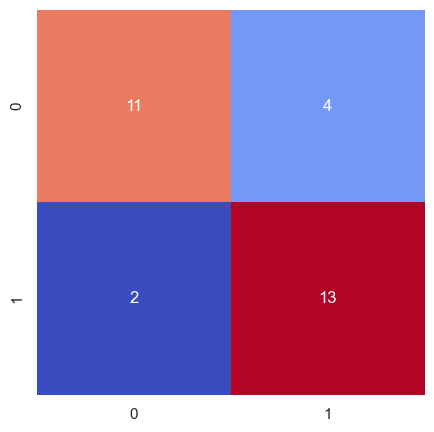

In [38]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [39]:
acc = metrics.accuracy_score(testY1,preds)
acc

0.8

In [40]:
indexes = np.random.randint(0,30,25)
indexes

array([ 8, 13,  8,  6,  0, 10, 27, 23, 12,  2,  0, 28, 29, 25, 12, 12, 28,
        5, 29,  8,  3, 21, 22, 22, 18])

In [41]:
labels = []

for i in indexes:
  pred = le.inverse_transform(preds)[i]
  labels.append(pred)

labels

[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]

In [42]:
results = []

for i in range(25):
  image = outputs1[i]

  if labels[i] == 'healthy':
    color = (0,255,0)
  else:
    color = (0,0,255)

  text = str(labels[i])

  image = cv2.resize(image,(128,128))
  cv2.putText(image,text,(3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

  results.append(image)

In [ ]:
montage = build_montages(results,(128,128),(5,5))[0]
cv2.imshow("Output",montage)
cv2.waitKey(0)

# Save The Model

In [ ]:
import pickle
pickle.dump(model,open('parkinson.pkl','wb'))